In [1]:
# Xin quyen Google drive
from google.colab import drive
drive.mount('/content/ggdrive')

Mounted at /content/ggdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/ggdrive/MyDrive/Phân tích hiệu suất kinh doanh TIMA/test2.csv")

In [3]:
#Phân tích Mô tả

In [4]:
#1. Tính giá trị trung bình của "Số tiền vay"
mean_loan_amount = df["Số tiền đăng ký vay ban đầu"].mean()
mean_loan_amount = round(mean_loan_amount)
# In kết quả
print(f"Giá trị trung bình của 'Số tiền đăng ký vay ban đầu' là: {mean_loan_amount} VND")

Giá trị trung bình của 'Số tiền đăng ký vay ban đầu' là: 12814071 VND


In [5]:
#3. Tính tổng "Tiền giải ngân"
total_interest = df["Tiền giải ngân"].sum()
# In kết quả
print(f"Tổng của 'Tiền giải ngân' là: {total_interest} VND")

Tổng của 'Tiền giải ngân' là: 27974177000 VND


In [6]:
#4. Hiển thị các thống kê mô tả cho "Điểm tín dụng"
# Hiển thị các thống kê mô tả cho cột "TS_CREDIT_SCORE_V2"
credit_score_stats = df["TS_CREDIT_SCORE_V2"].describe()

# In kết quả
print("Thống kê mô tả cho Điểm tín dụng (TS_CREDIT_SCORE_V2):")
print(credit_score_stats)

Thống kê mô tả cho Điểm tín dụng (TS_CREDIT_SCORE_V2):
count    2383.000000
mean      589.748636
std        96.971389
min       300.000000
25%       535.000000
50%       599.000000
75%       660.000000
max       826.000000
Name: TS_CREDIT_SCORE_V2, dtype: float64


In [7]:
#5. Tính số lượng khách hàng theo từng "Trạng thái"
status_counts = df["Trạng thái"].value_counts()
# In kết quả
print("Số lượng khách hàng theo từng Trạng thái:")
print(status_counts)

Số lượng khách hàng theo từng Trạng thái:
Trạng thái
Kết thúc    1587
Đang Vay     590
Nợ Xấu       206
Name: count, dtype: int64


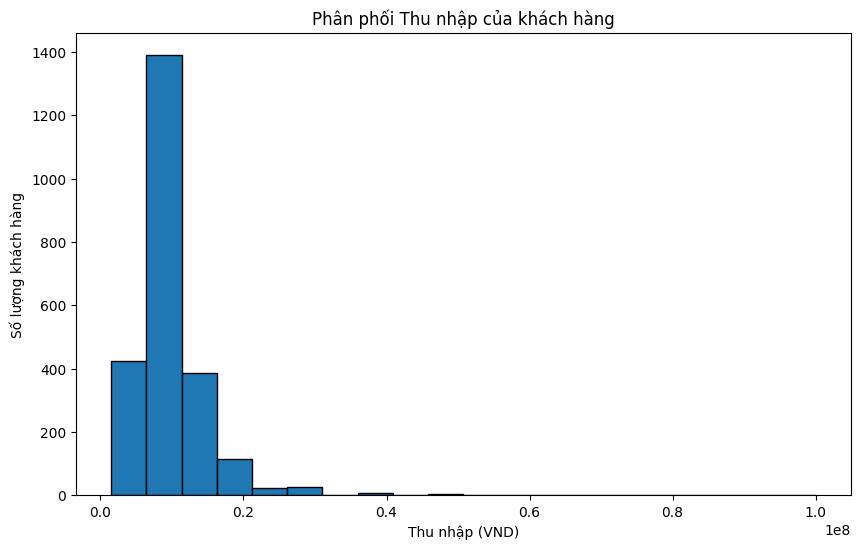

In [8]:
#6. Vẽ biểu đồ phân phối cho "Thu nhập"
# Vẽ biểu đồ histogram cho cột "Salary"
plt.figure(figsize=(10, 6))
df["Salary"].hist(bins=20, edgecolor='black')
plt.title("Phân phối Thu nhập của khách hàng")
plt.xlabel("Thu nhập (VND)")
plt.ylabel("Số lượng khách hàng")
plt.grid(False)
plt.show()

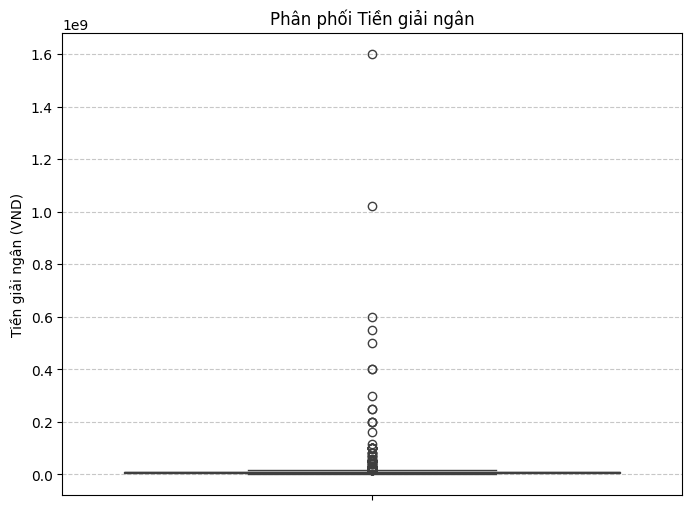

In [9]:
#7. Vẽ biểu đồ boxplot cho "Tiền giải ngân"
# Vẽ biểu đồ boxplot cho cột "Tiền giải ngân"
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["Tiền giải ngân"])
plt.title("Phân phối Tiền giải ngân")
plt.ylabel("Tiền giải ngân (VND)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

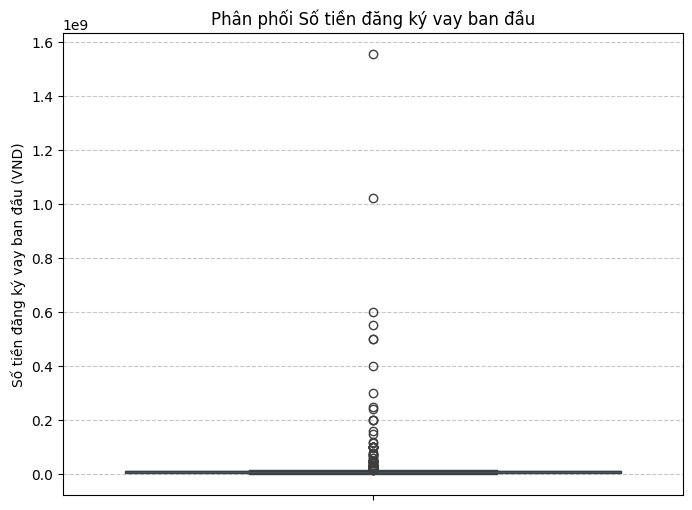

In [10]:
#Phân phối Tiền vay ban đầu
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["Số tiền đăng ký vay ban đầu"])
plt.title("Phân phối Số tiền đăng ký vay ban đầu")
plt.ylabel("Số tiền đăng ký vay ban đầu (VND)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
#8. Vẽ biểu đồ hình tròn cho tỷ lệ "Giới tính"
# Nhóm theo Giới tính và đếm số lượng CardNumber duy nhất
gender_unique_counts = df.groupby("Gender")["CardNumber"].nunique()

# Gán nhãn cho biểu đồ (0: Nam, 1: Nữ)
labels = ['Nam' if x == 0 else 'Nữ' for x in gender_unique_counts.index]

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
plt.pie(gender_unique_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Tỷ lệ khách hàng theo Giới tính (dựa trên CardNumber duy nhất)")
plt.axis('equal')  # Đảm bảo biểu đồ hình tròn cân đối
plt.show()

In [12]:
#10. Tính số lượng khách hàng theo "Khu vực"
# Tính số lượng khách hàng theo "Khu vực"
region_counts = df.groupby("CityName").size()

# In kết quả
print("Số lượng khách hàng theo Khu vực:")
print(region_counts)

Số lượng khách hàng theo Khu vực:
CityName
Bắc Ninh          1
Hà Nội         2060
Hòa Bình          6
Hải Dương         1
Hải Phòng         1
Hồ Chí Minh     292
Lào Cai           1
Phú Thọ          10
Thanh Hóa         4
Thái Nguyên       1
Vĩnh Phúc         4
Yên Bái           1
Đồng Nai          1
dtype: int64


In [13]:
#11. Vẽ biểu đồ phân tán giữa "Lương" và "Điểm tín dụng"
# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Salary", y="TS_CREDIT_SCORE_V2", data=df)
plt.title("Mối quan hệ giữa Lương và Điểm tín dụng")
plt.xlabel("Lương (VND)")
plt.ylabel("Điểm tín dụng")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

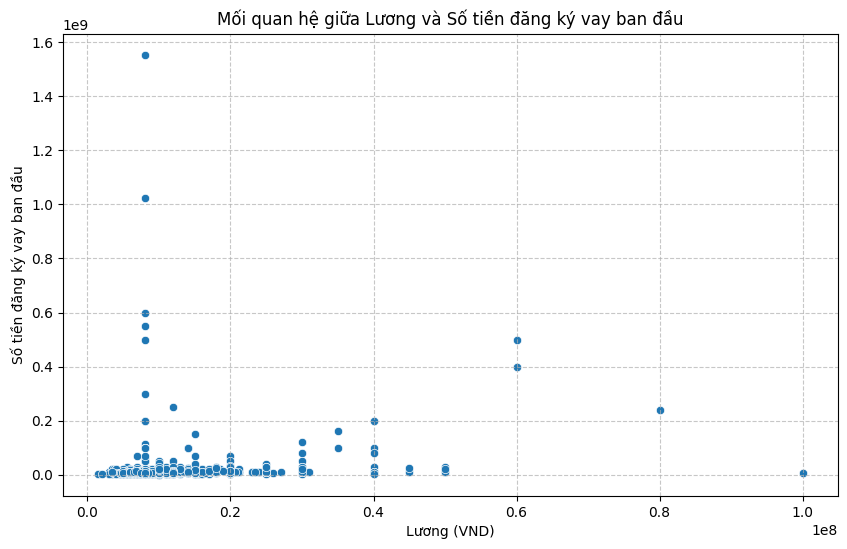

In [14]:
#Lương và số tiền vay
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Salary", y="Số tiền đăng ký vay ban đầu", data=df)
plt.title("Mối quan hệ giữa Lương và Số tiền đăng ký vay ban đầu")
plt.xlabel("Lương (VND)")
plt.ylabel("Số tiền đăng ký vay ban đầu")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [15]:
#12. Tính số lượng "Nợ xấu"
hasbaddebt_counts = df["HasBadDebt"].value_counts()

# In kết quả
print("Số lượng khoản vay theo giá trị trong cột HasBadDebt:")
print(hasbaddebt_counts)

bad_debt_count = hasbaddebt_counts.get(1, 0)
print("Số lượng khoản vay có Nợ Xấu (HasBadDebt = 1):", bad_debt_count)

Số lượng khoản vay theo giá trị trong cột HasBadDebt:
HasBadDebt
0    1963
1     420
Name: count, dtype: int64
Số lượng khoản vay có Nợ Xấu (HasBadDebt = 1): 420


In [16]:
# Lọc các khách hàng có HasBadDebt = 1 và đếm số lượng CardNumber duy nhất
bad_debt_unique_count = df[df["HasBadDebt"] == 1]["CardNumber"].nunique()

# In kết quả
print("Số lượng khách hàng có Nợ Xấu (HasBadDebt = 1):", bad_debt_unique_count)

Số lượng khách hàng có Nợ Xấu (HasBadDebt = 1): 359


In [17]:
#13.Tính giá trị trung bình của "Thời gian đã sống" theo "Ngành nghề"
import numpy as np
# Hàm chuẩn hóa "Thời gian đã sống" thành giá trị số trung bình
def normalize_living_time(time_str):
    if pd.isna(time_str):
        return np.nan
    time_str = str(time_str).strip().lower()
    if "hơn 10 năm" in time_str or "thời gian ở đó" in time_str:
        return 10.0
    elif "dưới 1 năm" in time_str:
        return 0.5  # Giả sử trung bình dưới 1 năm là 0.5 năm
    elif "1 - 3 năm" in time_str:
        return 2.0  # Trung bình của 1 và 3 là 2
    elif "3 - 10 năm" in time_str:
        return 6.5  # Trung bình của 3 và 10 là 6.5
    return np.nan

df["Thời gian đã sống"] = df["Thời gian đã sống"].apply(normalize_living_time)

df = df[df["Thời gian đã sống"].notnull()]

average_living_time_by_occupation = df.groupby("JobName")["Thời gian đã sống"].mean().round(2)

# In kết quả
print("Trung bình Thời gian đã sống(Năm) theo Ngành nghề (sau khi chuẩn hóa):")
print(average_living_time_by_occupation)

Trung bình Thời gian đã sống(Năm) theo Ngành nghề (sau khi chuẩn hóa):
JobName
Bán hàng                                             5.93
Bảo vệ                                               7.85
Bộ đội / công an                                     8.00
CQ Hành chính Nhà nước                               7.94
Chăm sóc KH                                          4.79
Các hình thức tự kinh doanh khác                     6.80
Công nhân                                            4.84
Công việc ko ổn định/Thu nhập thất thường           10.00
Giám Sát                                             4.83
Giáo viên                                            6.46
Giảng viên                                          10.00
Graber & khác                                        6.00
Hành chính                                           5.46
Hỗ trợ Kinh doanh                                    3.67
IT                                                   3.71
Kho                                                

In [18]:
#16. Tính số lượng khách hàng duy nhất theo "Ngành nghề" dựa trên CardNumber
occupation_unique_counts = df.groupby("JobName")["CardNumber"].nunique()

# In kết quả
print("Số lượng khách hàng duy nhất theo Ngành nghề (dựa trên CardNumber):")
print(occupation_unique_counts)

Số lượng khách hàng duy nhất theo Ngành nghề (dựa trên CardNumber):
JobName
Bán hàng                                             21
Bảo vệ                                               27
Bộ đội / công an                                      3
CQ Hành chính Nhà nước                                9
Chăm sóc KH                                           6
Các hình thức tự kinh doanh khác                    104
Công nhân                                            46
Công việc ko ổn định/Thu nhập thất thường             1
Giám Sát                                             19
Giáo viên                                            26
Giảng viên                                            1
Graber & khác                                         2
Hành chính                                           25
Hỗ trợ Kinh doanh                                     2
IT                                                    7
Kho                                                   9
Khác                        

In [28]:
# top 3 lượng khách hàng theo nghành nghề
# Get the top 3 occupations with the highest unique customer counts
top_3_occupations = occupation_unique_counts.sort_values(ascending=False).head(5)

# Print the result
print("Top 3 ngành nghề có số lượng khách hàng duy nhất cao nhất (dựa trên CardNumber):")
print(top_3_occupations)

Top 3 ngành nghề có số lượng khách hàng duy nhất cao nhất (dựa trên CardNumber):
JobName
Nhân viên chính thức                829
Unknown                             110
Các hình thức tự kinh doanh khác    104
Nhân viên không có HĐLĐ              71
Tự doanh tại nhà                     71
Name: CardNumber, dtype: int64


In [20]:
#17. Hiển thị các giá trị lớn nhất của "Số tiền vay"
# Lấy 5 giá trị lớn nhất của "Số tiền vay"
largest_loan_amounts = df["Số tiền đăng ký vay ban đầu"].nlargest(5)

# In kết quả
print("5 giá trị lớn nhất của Số tiền vay:")
print(largest_loan_amounts)

5 giá trị lớn nhất của Số tiền vay:
1883    1553290000
2252    1023000000
2046     600000000
1970     550000000
2373     500000000
Name: Số tiền đăng ký vay ban đầu, dtype: int64


In [21]:
#19. Kiểm tra sự phân phối của "Điểm tín dụng"
# Trích xuất cột điểm tín dụng
credit_scores = df["TS_CREDIT_SCORE_V2"]

# Làm sạch dữ liệu: loại bỏ giá trị thiếu và đảm bảo dữ liệu là số
credit_scores = pd.to_numeric(credit_scores, errors='coerce').dropna()

# Tính các thống kê cơ bản
mean_score = credit_scores.mean()
median_score = credit_scores.median()
min_score = credit_scores.min()
max_score = credit_scores.max()

# Thiết lập giao diện cho biểu đồ
sns.set(style="whitegrid")

# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
sns.distplot(credit_scores, bins=20, kde=True, color='blue', hist_kws={'edgecolor': 'black'})
plt.title("Phân phối của Điểm Tín dụng (TS_CREDIT_SCORE_V2)", fontsize=14)
plt.xlabel("Điểm Tín dụng", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)

# Thêm thông tin thống kê vào biểu đồ
plt.text(0.95, 0.95, f'Trung bình: {mean_score:.2f}\nTrung vị: {median_score:.2f}\nMin: {min_score:.2f}\nMax: {max_score:.2f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Hiển thị biểu đồ
plt.show()

/tmp/ipython-input-210204806.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_scores, bins=20, kde=True, color='blue', hist_kws={'edgecolor': 'black'})


Số lượng khoản vay theo thành phố:
      CityName  LoanCount
1       Hà Nội       1897
5  Hồ Chí Minh        285
7      Phú Thọ          9
2     Hòa Bình          6
9    Vĩnh Phúc          2
8    Thanh Hóa          2
0     Bắc Ninh          1
3    Hải Dương          1
4    Hải Phòng          1
6      Lào Cai          1

Tổng số khoản vay: 2205


/tmp/ipython-input-1765588649.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LoanCount', y='CityName', data=loan_counts, palette='viridis')


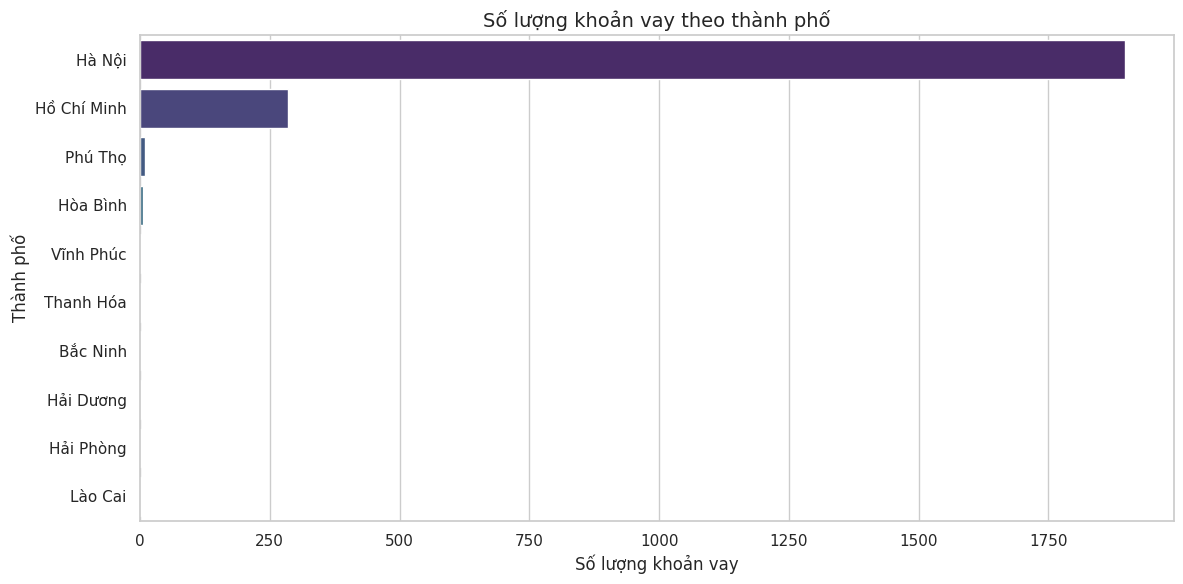

In [22]:
#20. Tính số lượng "Số lượng khoản vay" theo "Thành phố"
# Làm sạch dữ liệu: loại bỏ các giá trị thiếu trong cột CityName
df = df.dropna(subset=['CityName', 'NumberOfLoans'])

# Chuyển đổi NumberOfLoans thành số nguyên, xử lý giá trị không hợp lệ
df['NumberOfLoans'] = pd.to_numeric(df['NumberOfLoans'], errors='coerce').fillna(0).astype(int)

# Nhóm dữ liệu theo CityName và tính số lượng khoản vay
loan_counts = df.groupby('CityName').size().reset_index(name='LoanCount')

# Sắp xếp theo số lượng khoản vay giảm dần
loan_counts = loan_counts.sort_values(by='LoanCount', ascending=False)

# Hiển thị kết quả
print("Số lượng khoản vay theo thành phố:")
print(loan_counts)

# Tính tổng số khoản vay
total_loans = loan_counts['LoanCount'].sum()
print(f"\nTổng số khoản vay: {total_loans}")

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x='LoanCount', y='CityName', data=loan_counts, palette='viridis')
plt.title('Số lượng khoản vay theo thành phố', fontsize=14)
plt.xlabel('Số lượng khoản vay', fontsize=12)
plt.ylabel('Thành phố', fontsize=12)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Thống kê thu nhập theo nhóm tuổi:
  AgeGroup      median          mean      min        max
0      <25   7000000.0  7.808834e+06  3000000   25000000
1    25-35   8000000.0  9.811221e+06  1500000  100000000
2    35-45  10000000.0  1.128392e+07  3500000   35000000
3      >45  10000000.0  1.231293e+07  5000000   45000000


/tmp/ipython-input-1118848122.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='Salary', data=df, palette='viridis')
/tmp/ipython-input-1118848122.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby('AgeGroup')['Salary'].agg(['median', 'mean', 'min', 'max']).reset_index()


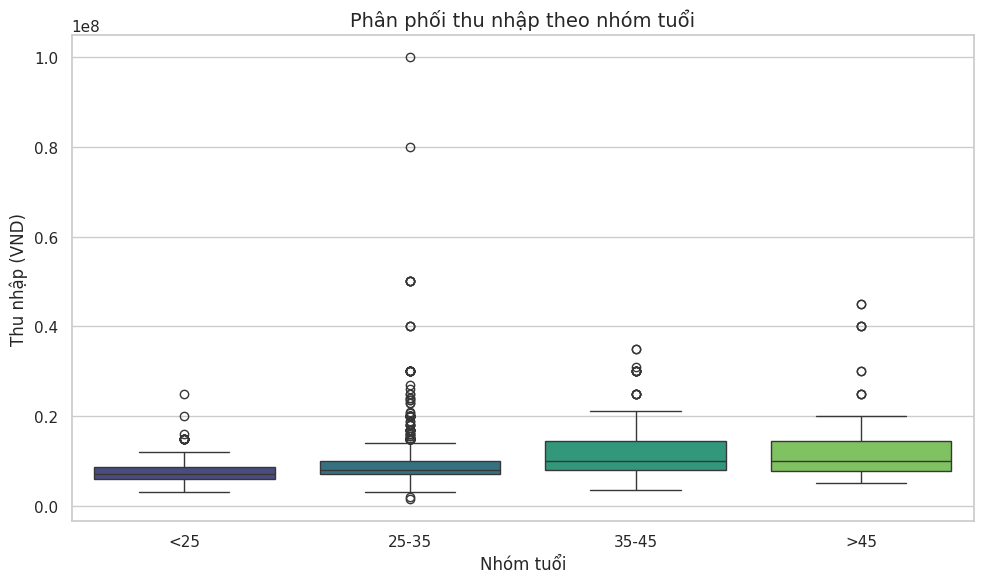

In [23]:
#21. Vẽ biểu đồ phân phối thu nhập của khách hàng theo nhóm tuổi
# Làm sạch dữ liệu: loại bỏ các giá trị thiếu trong cột Salary và Age
df = df.dropna(subset=['Salary', 'Age'])

# Chuyển đổi Salary và Age thành số, xử lý giá trị không hợp lệ
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce').fillna(0)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(0)

# Loại bỏ các hàng có Age hoặc Salary không hợp lý (ví dụ: Age <= 0 hoặc Salary < 0)
df = df[(df['Age'] > 0) & (df['Salary'] >= 0)]

# Phân nhóm tuổi thành các khoảng
bins = [0, 25, 35, 45, 100]  # Các khoảng tuổi: <25, 25-35, 35-45, >45
labels = ['<25', '25-35', '35-45', '>45']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Thiết lập giao diện cho biểu đồ
sns.set(style="whitegrid")

# Vẽ biểu đồ hộp
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='Salary', data=df, palette='viridis')
plt.title('Phân phối thu nhập theo nhóm tuổi', fontsize=14)
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Thu nhập (VND)', fontsize=12)

# Tính toán thống kê cơ bản cho mỗi nhóm tuổi
stats = df.groupby('AgeGroup')['Salary'].agg(['median', 'mean', 'min', 'max']).reset_index()
print("Thống kê thu nhập theo nhóm tuổi:")
print(stats)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [24]:
#22. Vẽ biểu đồ tần suất "Giới tính"
# Làm sạch dữ liệu: loại bỏ các giá trị thiếu trong cột Gender
df = df.dropna(subset=['Gender'])

# Chuyển đổi Gender thành số nguyên, xử lý giá trị không hợp lệ
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce').fillna(-1).astype(int)

# Loại bỏ các giá trị không hợp lệ (không phải 0 hoặc 1)
df = df[df['Gender'].isin([0, 1])]

# Đếm tần suất giới tính
gender_counts = df['Gender'].value_counts().rename({0: 'Nam', 1: 'Nữ'}).reset_index()
gender_counts.columns = ['Gender', 'Count']

# Thiết lập giao diện cho biểu đồ
sns.set(style="whitegrid")

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Count', data=gender_counts, palette='viridis')
plt.title('Tần suất giới tính trong dữ liệu', fontsize=14)
plt.xlabel('Giới tính', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Thêm nhãn số lượng lên trên các cột
for i, count in enumerate(gender_counts['Count']):
    plt.text(i, count + 0.02 * count, str(count), ha='center', va='bottom', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

/tmp/ipython-input-1580560431.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Count', data=gender_counts, palette='viridis')


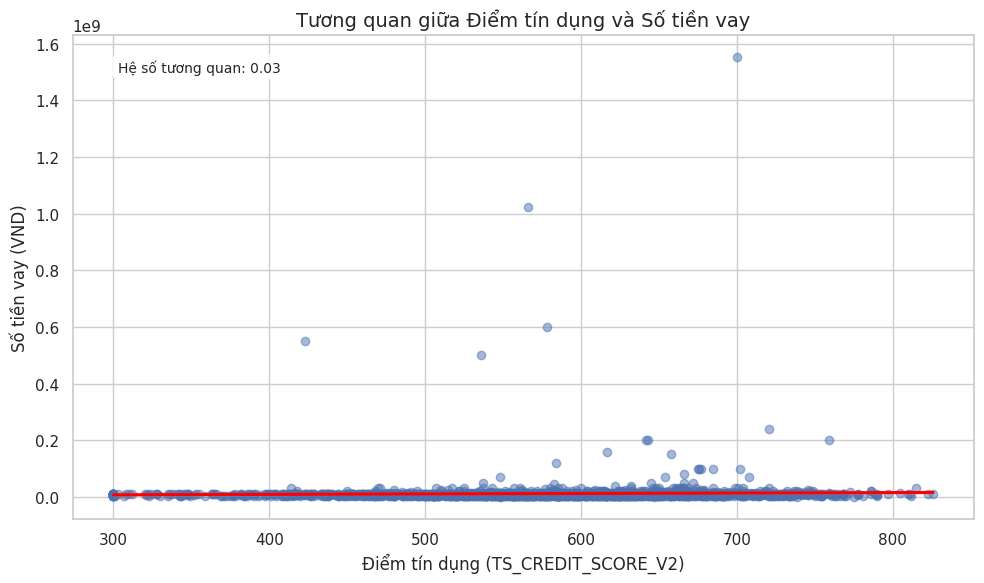

In [25]:
#23. Kiểm tra sự tương quan giữa "Điểm tín dụng" và "Số tiền vay"
# Làm sạch dữ liệu: loại bỏ các giá trị thiếu trong cột TS_CREDIT_SCORE_V2 và LoanAmount
df = df.dropna(subset=['TS_CREDIT_SCORE_V2', 'Số tiền đăng ký vay ban đầu'])

# Chuyển đổi các cột thành số, xử lý giá trị không hợp lệ
df['TS_CREDIT_SCORE_V2'] = pd.to_numeric(df['TS_CREDIT_SCORE_V2'], errors='coerce')
df['Số tiền đăng ký vay ban đầu'] = pd.to_numeric(df['Số tiền đăng ký vay ban đầu'], errors='coerce')

# Loại bỏ các hàng có giá trị thiếu sau khi chuyển đổi
df = df.dropna(subset=['TS_CREDIT_SCORE_V2', 'Số tiền đăng ký vay ban đầu'])

# Tính hệ số tương quan Pearson
correlation = df[['TS_CREDIT_SCORE_V2', 'Số tiền đăng ký vay ban đầu']].corr().iloc[0, 1]

# Thiết lập giao diện cho biểu đồ
sns.set(style="whitegrid")

# Vẽ biểu đồ phân tán với đường hồi quy
plt.figure(figsize=(10, 6))
sns.regplot(x='TS_CREDIT_SCORE_V2', y='Số tiền đăng ký vay ban đầu', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Tương quan giữa Điểm tín dụng và Số tiền vay', fontsize=14)
plt.xlabel('Điểm tín dụng (TS_CREDIT_SCORE_V2)', fontsize=12)
plt.ylabel('Số tiền vay (VND)', fontsize=12)

# Thêm nhãn hệ số tương quan lên biểu đồ
plt.text(0.05, 0.95, f'Hệ số tương quan: {correlation:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

/tmp/ipython-input-3822165675.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hình thức cư trú', data=residency_counts, palette='viridis')


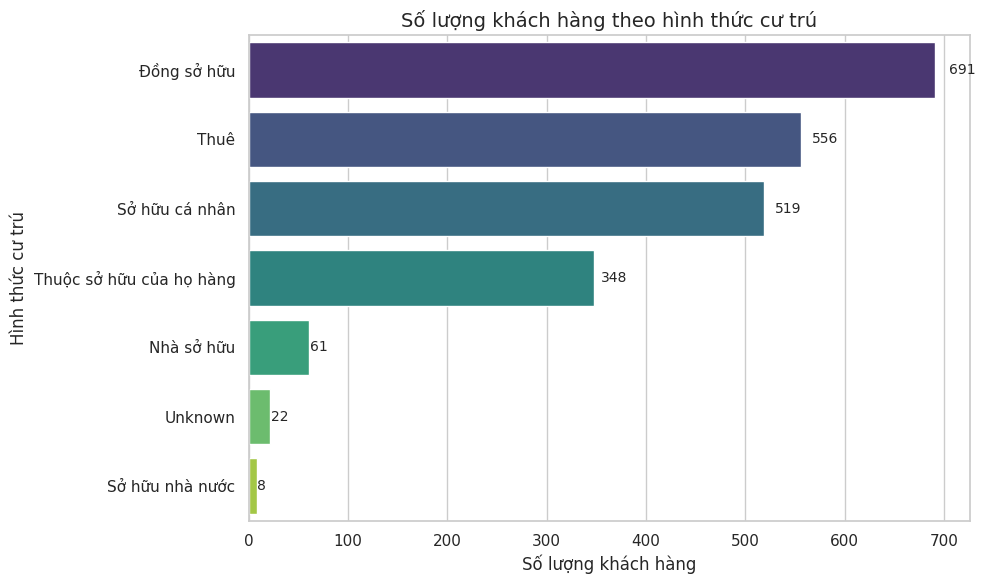

/tmp/ipython-input-3822165675.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hình thức cư trú', y='TS_CREDIT_SCORE_V2', data=df, palette='viridis')


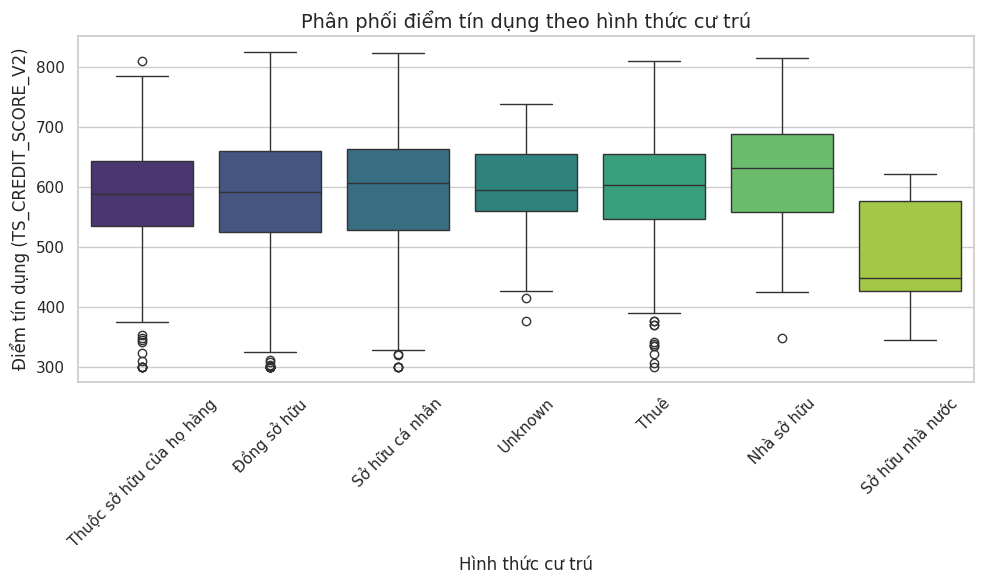

Số lượng khách hàng theo hình thức cư trú:
           Hình thức cư trú  Count
6               Đồng sở hữu    691
3                      Thuê    556
1            Sở hữu cá nhân    519
4  Thuộc sở hữu của họ hàng    348
0                Nhà sở hữu     61
5                   Unknown     22
2           Sở hữu nhà nước      8

Thống kê đặc điểm theo hình thức cư trú:
              ResidencyType  Avg_Credit_Score   Avg_Salary  Avg_LoanAmount
0                Nhà sở hữu            616.92  10754098.36     13180327.87
1            Sở hữu cá nhân            591.80  10636799.61     19722138.73
2           Sở hữu nhà nước            481.50   8937500.00      9375000.00
3                      Thuê            596.74   9677069.76      8847302.16
4  Thuộc sở hữu của họ hàng            582.31   9577324.71      9060465.52
5                   Unknown            592.14  11644090.91      7795454.55
6               Đồng sở hữu            582.03   9963089.73     10070911.72


In [26]:
#24. Phân tích số liệu theo loại "Hình thức cư trú"
# Làm sạch dữ liệu: loại bỏ các giá trị thiếu trong cột ResidencyType
df = df.dropna(subset=['Hình thức cư trú'])

# Chuyển đổi các cột số thành số, xử lý giá trị không hợp lệ
df['TS_CREDIT_SCORE_V2'] = pd.to_numeric(df['TS_CREDIT_SCORE_V2'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Số tiền đăng ký vay ban đầu'] = pd.to_numeric(df['Số tiền đăng ký vay ban đầu'], errors='coerce')

# Nhóm dữ liệu theo ResidencyType và tính số lượng khách hàng
residency_counts = df.groupby('Hình thức cư trú').size().reset_index(name='Count')

# Sắp xếp theo số lượng giảm dần
residency_counts = residency_counts.sort_values(by='Count', ascending=False)

# Tính thống kê bổ sung (trung bình điểm tín dụng, thu nhập, số tiền vay)
residency_stats = df.groupby('Hình thức cư trú').agg({
    'TS_CREDIT_SCORE_V2': 'mean',
    'Salary': 'mean',
    'Số tiền đăng ký vay ban đầu': 'mean'
}).reset_index().round(2)

# Đổi tên cột cho rõ ràng
residency_stats.columns = ['ResidencyType', 'Avg_Credit_Score', 'Avg_Salary', 'Avg_LoanAmount']

# Thiết lập giao diện cho biểu đồ
sns.set(style="whitegrid")

# Vẽ biểu đồ cột cho số lượng khách hàng
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Hình thức cư trú', data=residency_counts, palette='viridis')
plt.title('Số lượng khách hàng theo hình thức cư trú', fontsize=14)
plt.xlabel('Số lượng khách hàng', fontsize=12)
plt.ylabel('Hình thức cư trú', fontsize=12)

# Thêm nhãn số lượng lên trên các cột
for i, count in enumerate(residency_counts['Count']):
    plt.text(count + 0.02 * count, i, str(count), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Vẽ biểu đồ hộp cho điểm tín dụng theo hình thức cư trú
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hình thức cư trú', y='TS_CREDIT_SCORE_V2', data=df, palette='viridis')
plt.title('Phân phối điểm tín dụng theo hình thức cư trú', fontsize=14)
plt.xlabel('Hình thức cư trú', fontsize=12)
plt.ylabel('Điểm tín dụng (TS_CREDIT_SCORE_V2)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hiển thị kết quả
print("Số lượng khách hàng theo hình thức cư trú:")
print(residency_counts)
print("\nThống kê đặc điểm theo hình thức cư trú:")
print(residency_stats)

In [27]:
#25. Tính tổng số "Khoản vay" theo từng "Phường"
# Làm sạch dữ liệu: loại bỏ các giá trị thiếu trong cột WardName
df = df.dropna(subset=['DistrictName'])

# Nhóm dữ liệu theo WardName và đếm số lượng giao dịch (khoản vay)
loan_counts = df.groupby('DistrictName').size().reset_index(name='TotalLoans')

# Sắp xếp theo tổng số khoản vay giảm dần
loan_counts = loan_counts.sort_values(by='TotalLoans', ascending=False)

# Lấy top 10 phường để hiển thị (tránh biểu đồ quá đông)
top_10_loans = loan_counts.head(10)

# Thiết lập giao diện cho biểu đồ
sns.set(style="whitegrid")

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalLoans', y='DistrictName', data=top_10_loans, palette='viridis')
plt.title('Tổng số khoản vay theo phường (Top 10)', fontsize=14)
plt.xlabel('Tổng số khoản vay', fontsize=12)
plt.ylabel('Phường', fontsize=12)

# Thêm nhãn số lượng lên trên các cột
for i, total in enumerate(top_10_loans['TotalLoans']):
    plt.text(total + 0.02 * total, i, str(total), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Hiển thị kết quả
print("Tổng số khoản vay theo phường:")
print(loan_counts)

# Tính tổng số khoản vay
total_loans_all = loan_counts['TotalLoans'].sum()
print(f"\nTổng số khoản vay (tất cả phường): {total_loans_all}")

/tmp/ipython-input-326652419.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalLoans', y='DistrictName', data=top_10_loans, palette='viridis')


Tổng số khoản vay theo phường:
    DistrictName  TotalLoans
27     Hoàng Mai         236
54       Đống Đa         172
44    Thanh Xuân         164
32     Long Biên         162
28       Hà Đông         157
20      Cầu Giấy         148
24  Hai Bà Trưng         143
18   Bắc Từ Liêm         138
35   Nam Từ Liêm         137
13       Ba Đình         121
43     Thanh Trì         103
49        Tây Hồ          66
26     Hoàn Kiếm          56
15    Bình Thạnh          34
46       Thủ Đức          25
22       Gia Lâm          25
11             9          24
16      Bình Tân          23
53      Đông Anh          22
3             12          20
23        Gò Vấp          20
1             10          15
10             8          14
0              1          12
48       Tân Phú          12
40       Sóc Sơn          11
9              7          11
47      Tân Bình          11
34       Mê Linh          11
5              3          10
38     Phú Nhuận          10
8              6           9
6           